# Project: Investigate medical appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The appointment services are such a convenient service to shorten the process of going to the doctor and save the time of patients. On the other hand, it can improve the service quality and efficiency of the hospital. However, it has been found that there are several patients made an appointment but no show.

The report aims to know the reason and the features that affect the appointment. The dataset uses 110,527 medical appointments in Brazil. It includes 14 features/variables:

> 1. PatientId: Identification of a patient
> 2. AppointmentID: Identification of each appointment
> 3. Gender: Male (M) or Female (F).
> 4. ScheduleDay: The day of the scheduled appointment, which is ideally before the actual appointment.
> 5. AppointmentDay: The day someone called or registered the appointment, when they have to visit the doctor.
> 6. Age: How old is the patient.
> 7. Neighbourhood: Where the appointment takes place.
> 8. Scholarship: True (1) or False (0). Whether the patient  joined "Bolsa Família" program.
> 9. Hipertension: True (1) or False (0). Whether the patient has hypertension.
> 10. Diabetes: True (1) or False (0). Whether the patient has disbetes.
> 11. Handcap: True (1) or False (0). Whether the patient is handicapped.
> 12. SMS_received: True (1) or False (0), indicating that 1 or more messages sent to the patient.
> 13. No-show: "Yes" means "No show"; "No" means "the patient visit the doctor".

*Please be noted that the feature would be bold in the following analysis.

__*Source: Kaggle*__ https://www.kaggle.com/joniarroba/noshowappointments 

The questions that the report aims to answer are:
 1. How many patients made appointments but no show?
 2. What is the distribution of each feature/variable?
  
After knowing the overall situation, the second part is to understand the key factors that affect the patients to miss their scheduled appointment:

 3. What are the key factors that affect the patients to miss their scheduled appointments? 
- __**Age**__
- __**Gender**__
- __**Duration**__
- __**Scholarship**__
- __**SMS received**__
 
The following report consists of several sections: Data Wrangling, Exploratory Data Analysis and Conclusion. Before conducting data wrangling, first import packages needed. 

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

This section is to ensure the cleanliness of the data. It contains 2 steps: data detection and data cleaning. First, the general properties such as missing value and duplication would be detected. Then the report would demonstrate the data cleaning process.

### General Properties

In [2]:
#Load data and print a few lines
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The result shows that there are some typos of the feature. For example, "hipertension" should be "hypertension" and "handcap" should be "handicap". 

In [3]:
#Check data shape
df.shape

(110527, 14)

In [4]:
#Check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The informtaion indicates that the data orginally contains 14 features as well as 110,527 records and has no null value. It also tells that there are typos in several feature names.

In [5]:
#Check data statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#Check Age
df.Age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

The result shows that the minimum of __**Age**__ is minus value, which is not in line with the common knowledge (the age of any creature on Earth starts from 0).

In [7]:
#Check data duplication
df.duplicated().sum()

0

The result tells that there is no data duplication issue, which is great.

In [8]:
#Check missing value
df.isnull().any(axis=1).sum()
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

The result indicates that there is no missing value, which derease the difficulties of data wrangling section.

In [9]:
#Check AppointmentDay is not before ScheduledDay
df[df['AppointmentDay']<df['ScheduledDay']].head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The definition of the fourth and the fifth feature, __**ScheduledDay**__ and __**AppointmentDay**__, tells us that:

> 4. ScheduleDay: The day of the scheduled appointment, which is before the actual appointment.
> 5. AppointmentDay: The day someone called or registered the appointment, when they have to visit the doctor.

However, the result illustrates that there are several patients whose __**AppointmentDay**__ is before __**ScheduledDay**__. Perhaps these are due to errors generated in data process such as typo.

### Data Cleaning

In the previous step, several problems (or inconsistencies) are detected. The next step is to perform the corresponding cleaning methods, which contains field renaming, filtering the minus value and other data preparation.

In [10]:
#Rename field name
df.rename(columns = {'PatientId':'PatientID',
                     'Hipertension':'Hypertension',
                     'Handcap':'Handicap'},inplace = True)
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The typo problems in feature __**Hypertension**__ and __**Handicap**__ are cleared. Moreover, __**PatientId**__ has been renamed to __**PatientID**__ in correspondence with the naming of __**AppointmentID**__.

Next, to prepare for the upcoming analysis, feature __**AppointmentDay**__ and __**ScheduledDay**__ would be adjusted.

In [11]:
#Transform the type of AppointmentDay and ScheduledDay from object to datetime
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientID         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [12]:
#Deal with AppointmentDay and ScheduleDay timelag problem
#Calculate the duration between AppointmentDay and ScheduledDay
df['Duration'] =  df['AppointmentDay'] - df['ScheduledDay']
df['Duration']
df['Duration'] = df['Duration'].apply(lambda x: x.days)
df['Duration']
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Duration
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1


From the previous work, the type of __**AppointmentDay**__ and __**ScheduledDay**__ are transformed and their difference - __**Duration**__ is calculated. Please be noted that -1 means __**ScheduledDay**__ and __**AppointmentDay**__ are the same.

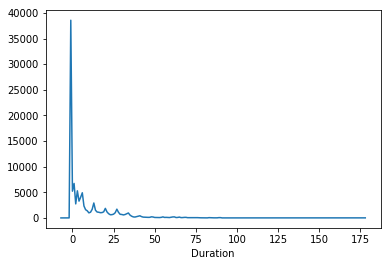

In [13]:
df.groupby('Duration').size().plot()

In [14]:
#Check the number of patients whose ScheduleDay is earlier than AppointmentDay
#SQL code:
#select No-show, count()
#from df
#where Duration<-1
#group by No-show
DurationMinus = df.query("Duration<-1")
DurationMinus.count()
DurationMinus.groupby('No-show').size()

No-show
Yes    5
dtype: int64

The distribution of __**Duration**__ shows that most of the patients receive treatment as appointed. However, there are 5 patients whose __**ScheduledDay**__ is earlier than __**AppointmentDay**__. Considering that these might be error and the proportion is small, the data would be filtered.

In [15]:
#Filter data and add Duration range
df = df[df['Duration']>=-1]
df.Duration.describe()

count    110522.000000
mean          9.184253
std          15.255115
min          -1.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: Duration, dtype: float64

The mean of __**Duration**__ is 9, while the maximum is 178. Based on the finding, the range of __**Duration**__ could generated.

In [16]:
#Add Duration range
duration_name = ['Same Day','1 Day Later','Within 7 Days','Within 30 Days','Within 90 Days','Within 180 Days']

duration_edge = [-2,-1,0,7,30,90,180]

df['Duration_Group'] = pd.cut(df['Duration'], duration_edge, labels=duration_name)

df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Duration,Duration_Group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1,Same Day
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1,Same Day
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1,Same Day
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,-1,Same Day
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1,Same Day


__**Duration**__ is seperated into several parts: "Same Day", "1 Day Later", "Within 7 Days", "Within 30 Days", "Within 90 Days" and "Within 180 Days".

It has been found that __**Age**__ has minus value. So the next step is to fix the problem and do some preparation.

In [17]:
#Fix Age value
df = df[df['Age']>=0]
df.Age.describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [18]:
#Add Age range
age_name = ['Childhood','Adolescence','Young Adult','Middle Adult','Old Age','Late Old Age']

age_edge = [-1,11,20,40,60,90,120]

df['Age_Period'] = pd.cut(df['Age'], age_edge, labels=age_name)

is_null_age = df['Age_Period'].isnull()

df[is_null_age]

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Duration,Duration_Group,Age_Period


The result shows that the minus value of __**Age**__ is removed from the data successfully (no null value). Samely, __**Age**__ is separated into several parts according to the Anthropomotorics: "Childhood", "Adolescence", "Young Adult", "Middle Adult", "Old Age" and "Late Old Age".

__*Source: Anthropomotorics*__ https://www.fsps.muni.cz/emuni/data/reader/book-19/04.html 

<a id='eda'></a>
## Exploratory Data Analysis

After cleaning the data, the next step is data exploration. Several computations and visualizations would be created to answer the questions mentioned before. First, the report would focus on one variable at a time, and then explore the relationships between variables.

### Question 1: How many patients made appointments but no show?

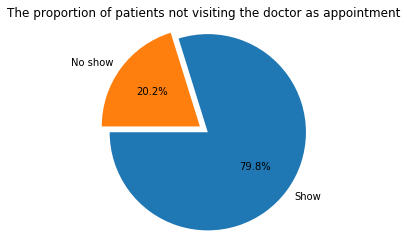

In [19]:
#Calculate the proportion and visualize
No_show = df['No-show'].value_counts()
label = 'Show','No show'
seperated = (0.1, 0)
plt.subplots(figsize=(4,4))
plt.pie(x=No_show,labels=label,autopct='%1.1f%%',explode=seperated,startangle = 180)
plt.axis('equal')
plt.title('The proportion of patients not visiting the doctor as appointment')
plt.show()

The pie chart shows that 20% of patients not visiting the doctor as appointment.

### Question 2: What is the distribution of the features/variables such as Age, Gender, etc?

Text(0.5, 1.0, 'Duration Group')

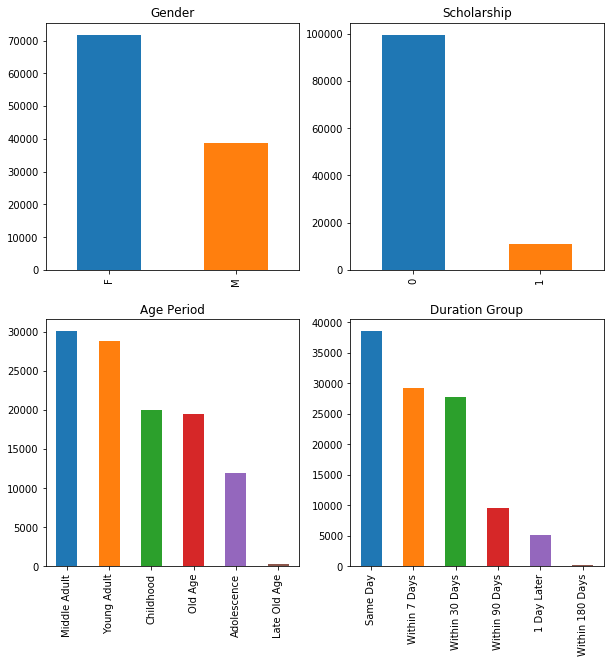

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

df['Gender'].value_counts().plot(ax=axes[0,0],kind='bar'); axes[0,0].set_title('Gender')

df['Scholarship'].value_counts().plot(ax=axes[0,1],kind='bar'); axes[0,1].set_title('Scholarship')

df['Age_Period'].value_counts().plot(ax=axes[1,0],kind='bar'); axes[1,0].set_title('Age Period')

df['Duration_Group'].value_counts().plot(ax=axes[1,1],kind='bar'); axes[1,1].set_title('Duration Group')

The four bar charts shows that:
 1. Nearly 70% of the patients are female, indicating that woman takes way more care of their health in comparison to the man.
 2. Most of the patients do not participate in the "Bolsa Família" program.
 3.	Across all ages, the middle adult and the young adults account for the most proportion (almost 30 thousand patients perspectively).
 4.	After scheduling the appointment, over 35 thousand patients show up as appointed.

After knowing the overall situation, next is to explore the key factors that affect the patients to miss their scheduled appointment.

### Question 3: What are the key factors that affect the patients to miss their scheduled appointment?

First I define a function to calculate the number and the proportion of the patients by the appointment. By inputting the features to the function, I could easily get the result and the visualization.

In [21]:
#Calculate the number and proportion of the patients by appointment and different featuers
def cal_num_percentage(feature):
    
    count_num = df.groupby(['No-show',feature]).count()['AppointmentID']
    total_num = df.groupby(['No-show']).count()['AppointmentID']
    No_show_percentage = count_num['Yes'] / total_num['Yes']
    Show_percentage = count_num['No']/ total_num['No']
    return No_show_percentage,Show_percentage

When comparing different quantities and when changing one variable, a bar chart that has bars of one color for one quantity value is recommended, according to Packt *. Thus, the visualization has to include multiple bar charts. I take the method in Packt * and Legend Guide * for reference and design the following figures.

__**Packt:**__ https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781849513265/1/ch01lvl1sec16/plotting-multiple-bar-charts

__**Legend Guide:**__
https://matplotlib.org/3.3.3/tutorials/intermediate/legend_guide.html

In [22]:
def multi_barchart(data1, data2, feature, group):
    data = [data1, data2]
    color_list = ['b','r']
    blue_patch = mpatches.Patch(color='blue', label='No show')
    red_patch = mpatches.Patch(color='red', label='Show')
    gap = .8 / len(data)
    for i, row in enumerate(data):
        x = np.arange(len(row))
        plt.bar(x + i * gap, row,
                width = gap,
                color = color_list[i % len(color_list)])
        plt.xticks(x + i * gap, group,rotation='vertical')
    plt.legend(handles=[blue_patch,red_patch])
    plt.title('Percentage by ' + feature + ' and No show')
    plt.xlabel(feature)
    plt.ylabel('Percentage')
plt.show()

### 3.1 Age

To demonstrate the efficiency of the function, I input the following code manually. First is to calculate the proportion and second is to draw visualization.

In [23]:
No_show_Age = cal_num_percentage('Age_Period')[0]
Show_Age = cal_num_percentage('Age_Period')[1]
No_show_Age, Show_Age

(Age_Period
 Childhood       0.180783
 Adolescence     0.137134
 Young Adult     0.296854
 Middle Adult    0.250560
 Old Age         0.131890
 Late Old Age    0.002779
 Name: AppointmentID, dtype: float64, Age_Period
 Childhood       0.180360
 Adolescence     0.100253
 Young Adult     0.251783
 Middle Adult    0.277642
 Old Age         0.187173
 Late Old Age    0.002789
 Name: AppointmentID, dtype: float64)

Knowing the proportion of show and no show by different age period, I use this information to draw the following visualization

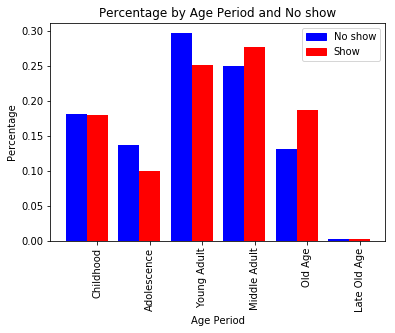

In [24]:
No_show_Age = cal_num_percentage('Age_Period')[0]
Show_Age = cal_num_percentage('Age_Period')[1]
data = [No_show_Age,Show_Age]
color_list = ['b','r']
blue_patch = mpatches.Patch(color='blue', label='No show')
red_patch = mpatches.Patch(color='red', label='Show')
group = ['Childhood','Adolescence','Young Adult','Middle Adult','Old Age','Late Old Age']
gap = .8 / len(data)
for i, row in enumerate(data):
    x = np.arange(len(row))
    plt.bar(x + i * gap, row,
           width = gap,
           color = color_list[i % len(color_list)])
    plt.xticks(x + i * gap, group,rotation='vertical')
plt.legend(handles=[blue_patch,red_patch])
plt.title('Percentage by Age Period and No show')
plt.xlabel('Age Period')
plt.ylabel('Percentage')
plt.show()

The figure shows that the attendance of patients of different ages varies. The higher the age, the more proportion of patients go to the hospital as appointed (middle adult and old age). On the contrary, the proportion of children, adolescence, and young adult not showing is higher.

### 3.2 Gender

In the remaining analysis, I use the defined function, which reduces repetitive typing and thus saves time.

In [25]:
No_show_Gender = cal_num_percentage('Gender')[0]
Show_Gender = cal_num_percentage('Gender')[1]
No_show_Gender, Show_Gender

(Gender
 F    0.653894
 M    0.346106
 Name: AppointmentID, dtype: float64, Gender
 F    0.648985
 M    0.351015
 Name: AppointmentID, dtype: float64)

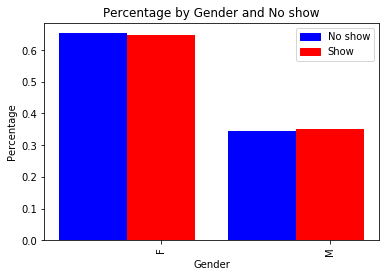

In [26]:
No_show_Gender = cal_num_percentage('Gender')[0]
Show_Gender = cal_num_percentage('Gender')[1]
group = ['F','M']
data = [No_show_Gender,Show_Gender]
multi_barchart(No_show_Gender, Show_Gender, 'Gender', group)

The figure indicates that there is no obvious difference. Among all the patients, the female patients are more than the male ones.

### 3.3 Duration

In [27]:
No_show_Duration_Group = cal_num_percentage('Duration_Group')[0]
Show_Duration_Group = cal_num_percentage('Duration_Group')[1]
No_show_Duration_Group, Show_Duration_Group

(Duration_Group
 Same Day           0.080308
 1 Day Later        0.049879
 Within 7 Days      0.328449
 Within 30 Days     0.397732
 Within 90 Days     0.141660
 Within 180 Days    0.001972
 Name: AppointmentID, dtype: float64, Duration_Group
 Same Day           0.416860
 1 Day Later        0.046482
 Within 7 Days      0.249130
 Within 30 Days     0.213827
 Within 90 Days     0.072375
 Within 180 Days    0.001326
 Name: AppointmentID, dtype: float64)

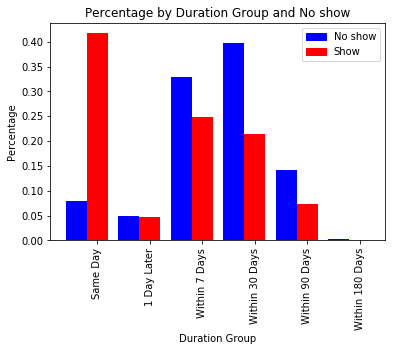

In [28]:
No_show_Duration_Group = cal_num_percentage('Duration_Group')[0]
Show_Duration_Group = cal_num_percentage('Duration_Group')[1]
group = ['Same Day','1 Day Later', 'Within 7 Days', 'Within 30 Days', 'Within 90 Days', 'Within 180 Days']
data = [No_show_Duration_Group,Show_Duration_Group]
multi_barchart(No_show_Duration_Group, Show_Duration_Group, 'Duration Group', group)

The figure above tells that most of the patients show up on the same day as the appointment. However, as time goes on, the patients tend not to show up. For instance, most of the patients would miss the appointment within 7 days, 30 days and 90 days.

### 3.4 Scholarship

In [29]:
No_show_Scholarship = cal_num_percentage('Scholarship')[0]
Show_Scholarship = cal_num_percentage('Scholarship')[1]
No_show_Scholarship, Show_Scholarship

(Scholarship
 0    0.884467
 1    0.115533
 Name: AppointmentID, dtype: float64, Scholarship
 0    0.906096
 1    0.093904
 Name: AppointmentID, dtype: float64)

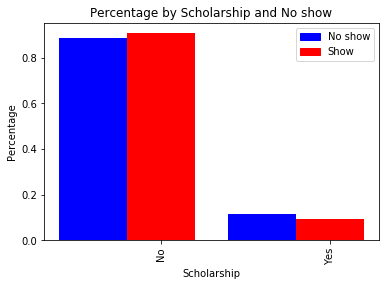

In [30]:
No_show_Scholarship = cal_num_percentage('Scholarship')[0]
Show_Duration_Group = cal_num_percentage('Scholarship')[1]
group = ['No','Yes']
data = [No_show_Scholarship,Show_Scholarship]
multi_barchart(No_show_Scholarship, Show_Scholarship, 'Scholarship', group)

Overall, most of the patients do not join the program. The figure shows that the patients not attending the program tend to show up as appointed. However, the proportion of the patients attending the program is lower.

### 3.5 SMS received

In [31]:
No_show_SMS_received = cal_num_percentage('SMS_received')[0]
Show_SMS_received = cal_num_percentage('SMS_received')[1]
No_show_SMS_received, Show_SMS_received

(SMS_received
 0    0.561531
 1    0.438469
 Name: AppointmentID, dtype: float64, SMS_received
 0    0.708663
 1    0.291337
 Name: AppointmentID, dtype: float64)

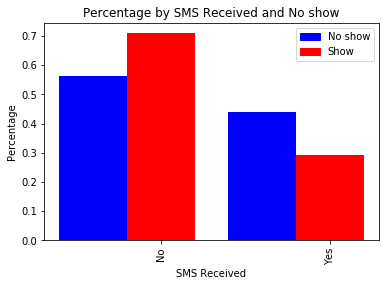

In [32]:
No_show_SMS_received = cal_num_percentage('SMS_received')[0]
Show_SMS_received = cal_num_percentage('SMS_received')[1]
group = ['No','Yes']
data = [No_show_SMS_received,Show_SMS_received]
multi_barchart(No_show_SMS_received, Show_SMS_received, 'SMS Received', group)

The figure illustrates that the patients not receiving SMS tend to show up as appointed, compared to the patients receiving SMS. Conversely, The patients having SMS tend not to show up. Most of the patients do not receive SMS.

<a id='conclusions'></a>
## Conclusions

From the exploratory data analysis, the questions mentioned before could be solved:

> 1. How many patients made appointments but no show?
> 2. What is the distribution of each feature/variable?

First, 20% of patients made appointments but no show. Second, nearly 70% of the patients are female. Moreover, the higher the age, the more proportion of patients go to the hospital as appointed. Results of __**Age**__ and __**Duration**__ indicate that woman and elderly take way more care of the health in comparison to the others.

Furthermore, after scheduling the appointment, over 35 thousand patients show up as appointed. However, as time goes on, the patients tend not to show up.

Other factors such as participation of the official program and receive of SMS have interesting results. Most of the patients do not participate in the "Bolsa Família" program. Also, the patients not attending the program tend to show up as appointed.

Most of the patients do not receive SMS. The patients not receiving SMS tend to show up as appointed, compared to the patients receiving SMS.

To summarize, age, time duration, whether joining the "Bolsa Família" program and SMS receiving are the factors that would affect the patients' attendance. However, this does not mean that features not being used in the analysis do not affect the result. So the next step of the analysis could include the following parts:
- Use the other features such as Hypertension, Diabetes and Handicap, etc
- Conduct more statistics computation
- Apply advanced analysis such as machine learning
